In [60]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

In [61]:
#Dataset Overview
dataset = pd.read_csv("DatasetRaw1.csv")
dataset = dataset[["LATE","GENDER","MARITAL" , "DISTRICT",  "EMPLOYMENT",  "INCOME",  "INSTALLMENT",
           "TENOR",  "IG_MONTH",  "POSTING_MIDNIGHT",  "REL_ACCOUNT",  "FOLLOWERS",  "FOLLOWING", "IGPOST_MONTH" ]]

In [62]:
#DATA PREPROCESSING = COLOUMN LATE
for x in dataset["LATE"]:
    if(x != 0):
        dataset['LATE'].replace({ x : 1 }, inplace=True)

In [63]:
dataset['DISTRICT']= dataset['DISTRICT'].str.upper()

In [64]:
print(dataset.GENDER.unique())
print(dataset.MARITAL.unique())
print(dataset.DISTRICT.unique())
print(dataset.EMPLOYMENT.unique())

['MALE' 'FEMALE']
['SINGLE' 'MARRIED']
['OTHER' 'KABUPATEN BANDUNG' 'KOTA BANDUNG']
['OTHER' 'WIRASWASTA' 'KARYAWAN' 'MANAJER']


In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
ohe = OneHotEncoder(dtype=np.int, sparse=True)
datasetNew = pd.DataFrame (
    ohe.fit_transform(dataset[["GENDER","MARITAL" , "DISTRICT",  "EMPLOYMENT"]]).toarray(),
    columns = ['GENDER_MALE','GENDER_FEMALE','MARITAL_SINGLE','MARITAL_MARRIED', 'DISTRICT_OTHER',
               'DISTRICT_KABUPATEN BANDUNG','DISTRICT_KOTA BANDUNG', 
             'EMPLOYMENT_OTHER','EMPLOYMENT_WIRASWASTA','EMPLOYMENT_KARYAWAN','EMPLOYMENT_MANAJER'])

In [67]:
datasetNew[["LATE",  "INCOME",  "INSTALLMENT",
           "TENOR",  "IG_MONTH",  "POSTING_MIDNIGHT",  "REL_ACCOUNT",  "FOLLOWERS",  "FOLLOWING", "IGPOST_MONTH" ]] =\
     dataset[["LATE",  "INCOME",  "INSTALLMENT",
           "TENOR",  "IG_MONTH",  "POSTING_MIDNIGHT",  "REL_ACCOUNT",  "FOLLOWERS",  "FOLLOWING", "IGPOST_MONTH" ]]

In [68]:
datasetNew

,GENDER_MALE,GENDER_FEMALE,MARITAL_SINGLE,MARITAL_MARRIED,DISTRICT_OTHER,DISTRICT_KABUPATEN BANDUNG,DISTRICT_KOTA BANDUNG,EMPLOYMENT_OTHER,EMPLOYMENT_WIRASWASTA,EMPLOYMENT_KARYAWAN,...,LATE,INCOME,INSTALLMENT,TENOR,IG_MONTH,POSTING_MIDNIGHT,REL_ACCOUNT,FOLLOWERS,FOLLOWING,IGPOST_MONTH
0,0,1,0,1,0,0,1,0,0,1,...,0,3000000,3760500,12,67,0,0,911,410,7
1,0,1,0,1,0,0,1,0,0,1,...,1,3785000,1430580,12,9,1,11,355,735,4
2,0,1,1,0,0,0,1,0,0,1,...,1,5000000,5028000,12,3,1,0,282,83,21
3,0,1,1,0,1,0,0,0,0,0,...,0,7000000,985000,2,31,0,74,731,561,5
4,0,1,1,0,0,1,0,1,0,0,...,0,2000000,1485000,6,49,0,25,436,461,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,0,1,0,0,0,0,1,...,0,1500000,543000,6,49,0,1,446,328,8
96,0,1,1,0,0,1,0,1,0,0,...,0,3000000,301500,3,19,1,0,126,336,1
97,0,1,1,0,0,1,0,0,0,0,...,0,12500000,17846844,12,49,0,0,1494,266,4
98,0,1,1,0,0,0,1,0,0,1,...,0,5000000,5028000,12,82,0,0,131,31,1


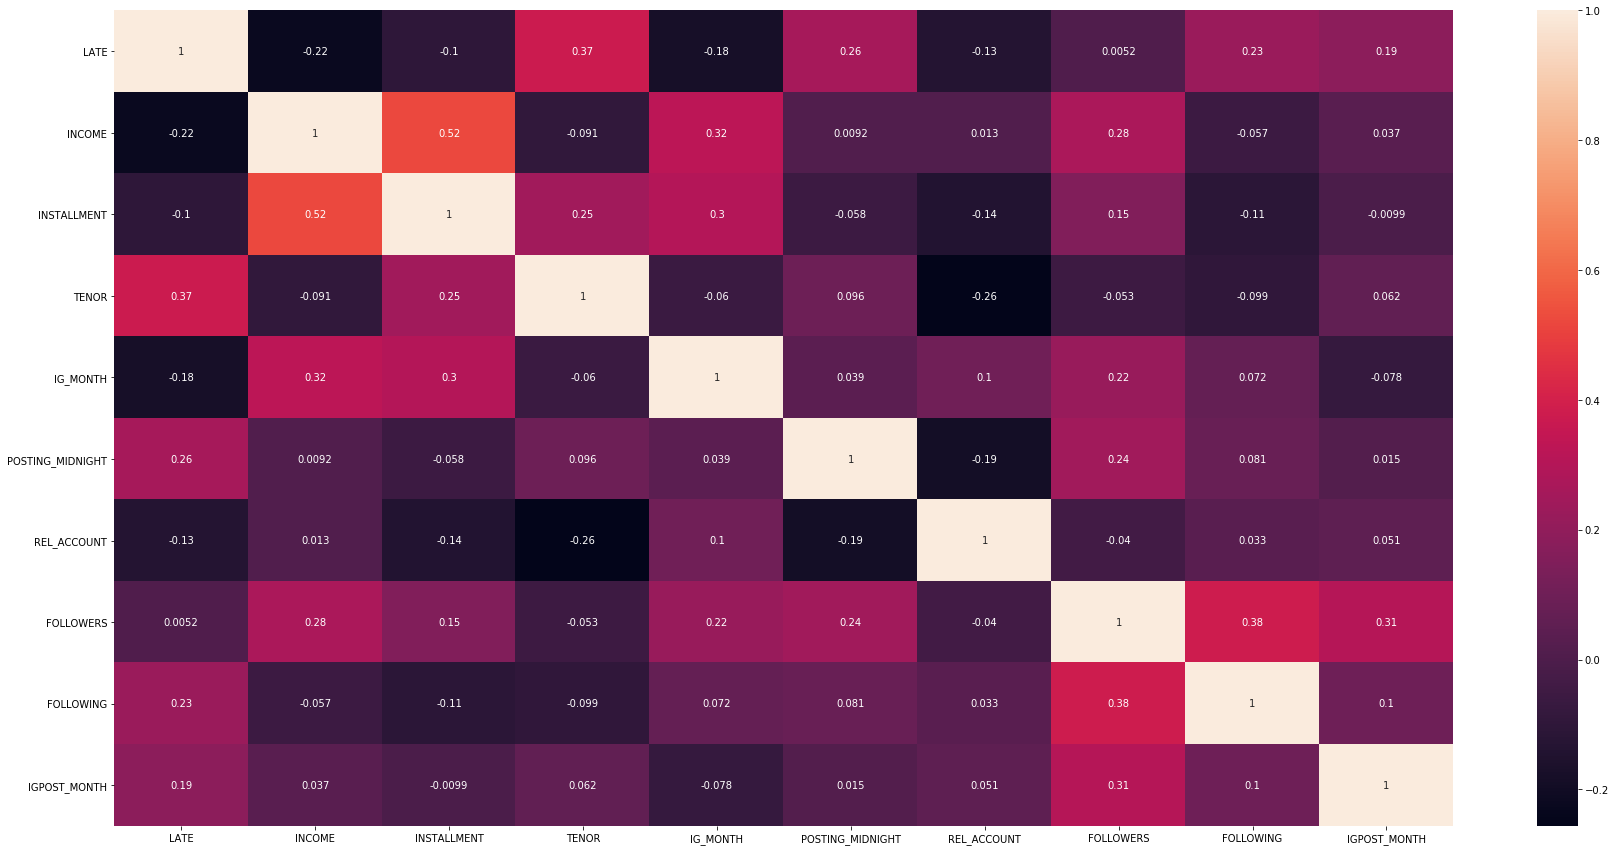

In [69]:
plt.subplots(figsize=(30,15))
sb.heatmap(dataset.corr(), annot=True)
plt.show()

In [70]:
corr = datasetNew.corr().sort_values('LATE',ascending=False)
value = corr['LATE']
print(value)

LATE                          1.000000
TENOR                         0.373300
POSTING_MIDNIGHT              0.260929
FOLLOWING                     0.229467
IGPOST_MONTH                  0.186938
EMPLOYMENT_KARYAWAN           0.175746
EMPLOYMENT_WIRASWASTA         0.113787
GENDER_MALE                   0.097399
DISTRICT_OTHER                0.083542
DISTRICT_KOTA BANDUNG         0.051506
MARITAL_SINGLE                0.013228
FOLLOWERS                     0.005191
MARITAL_MARRIED              -0.013228
EMPLOYMENT_MANAJER           -0.055414
GENDER_FEMALE                -0.097399
INSTALLMENT                  -0.103886
DISTRICT_KABUPATEN BANDUNG   -0.122525
REL_ACCOUNT                  -0.133731
IG_MONTH                     -0.178479
EMPLOYMENT_OTHER             -0.185256
INCOME                       -0.222132
Name: LATE, dtype: float64


In [71]:
X = datasetNew[['GENDER_MALE','GENDER_FEMALE','MARITAL_SINGLE','MARITAL_MARRIED', 'DISTRICT_OTHER',
               'DISTRICT_KABUPATEN BANDUNG','DISTRICT_KOTA BANDUNG', 
             'EMPLOYMENT_OTHER','EMPLOYMENT_WIRASWASTA','EMPLOYMENT_KARYAWAN','EMPLOYMENT_MANAJER', 
                "INCOME",  "INSTALLMENT",
           "TENOR",  "IG_MONTH",  "POSTING_MIDNIGHT",  "REL_ACCOUNT",  "FOLLOWERS",  "FOLLOWING", "IGPOST_MONTH"  ]]
Y = datasetNew['LATE']

In [72]:
#Split Data (Training & Testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20, stratify=dataset['LATE'])

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
sc = StandardScaler()
X_train[["INCOME",  "INSTALLMENT", "TENOR",  "IG_MONTH",  "POSTING_MIDNIGHT",  "REL_ACCOUNT",  
         "FOLLOWERS",  "FOLLOWING", "IGPOST_MONTH"]] = sc.fit_transform(X_train[["INCOME",  "INSTALLMENT",
           "TENOR",  "IG_MONTH",  "POSTING_MIDNIGHT",  "REL_ACCOUNT",  "FOLLOWERS",  "FOLLOWING", "IGPOST_MONTH"]])
X_test[["INCOME",  "INSTALLMENT", "TENOR",  "IG_MONTH",  "POSTING_MIDNIGHT",  "REL_ACCOUNT",  
         "FOLLOWERS",  "FOLLOWING", "IGPOST_MONTH"]] = sc.transform(X_test[["INCOME",  "INSTALLMENT", "TENOR",  "IG_MONTH",  "POSTING_MIDNIGHT",  "REL_ACCOUNT",  
         "FOLLOWERS",  "FOLLOWING", "IGPOST_MONTH"]])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = [
  {'C': [0.01, 0.1, 1, 2, 3, 4, 5, 6, 10, 100], 'kernel': ['linear']}
   ]

In [76]:
SV_Model = svm.SVC()
GridS = GridSearchCV(SV_Model, param_grid, cv=5)
GridS.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 2, 3, 4, 5, 6, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
GridS.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [78]:
clf = svm.SVC (C=0.01, kernel='linear', gamma='auto', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predict = clf.predict(X_train)

In [79]:
svm_cvscore = cross_val_score(clf, X_train, y_train, scoring=('accuracy'), cv=5, n_jobs=-1)

print('Accuracy CV STD & Mean for SVM:')
print(np.std(svm_cvscore), np.mean(svm_cvscore))

svm_cvscore = cross_val_score(clf, X_train, y_train, scoring=('recall'), cv=5, n_jobs=-1)

print('Recall CV STD & Mean for SVM:')
print(np.std(svm_cvscore), np.mean(svm_cvscore))

svm_cvscore = cross_val_score(clf, X_train, y_train, scoring=('precision'), cv=5, n_jobs=-1)

print('Precision CV STD & Mean for SVM:')
print(np.std(svm_cvscore), np.mean(svm_cvscore))

Accuracy CV STD & Mean for SVM:
0.03499271061118824 0.6857142857142857
Recall CV STD & Mean for SVM:
0.0 0.0
Precision CV STD & Mean for SVM:
0.0 0.0


In [80]:
print(metrics.classification_report(y_train, predict))
print(metrics.classification_report(y_test, y_pred))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        48
           1       0.00      0.00      0.00        22

    accuracy                           0.69        70
   macro avg       0.34      0.50      0.41        70
weighted avg       0.47      0.69      0.56        70

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.33      0.50      0.40        30
weighted avg       0.44      0.67      0.53        30

Accuracy: 0.6666666666666666
Precision: 0.0
Recall: 0.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


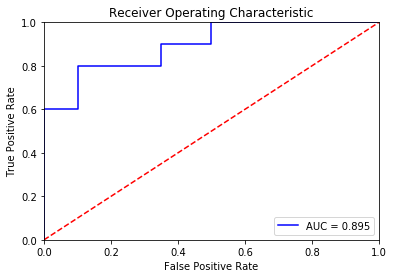

In [81]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(0.002251814779166462, 0.0043702426443552635, 0.007862703410017791, 0.007862703410017798, 0.008204567811086584, 0.008204567811086605, 0.009642733406708752, 0.01, 0.010528904969962121, 0.010806135353065049, 0.015272490762353494, 0.015582269424253392, 0.01569718350074273, 0.01656151258432, 0.017834084203419857, 0.019739381934939994, 0.03796425803696824, 0.0389480688786875, 0.05927243476924675, 0.09140076138123229)


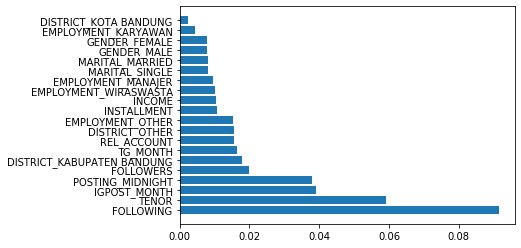

In [82]:
def f_importances(imp,names, top=-1):
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    print(imp)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = ['GENDER_MALE','GENDER_FEMALE','MARITAL_SINGLE','MARITAL_MARRIED', 'DISTRICT_OTHER',
               'DISTRICT_KABUPATEN BANDUNG','DISTRICT_KOTA BANDUNG', 
             'EMPLOYMENT_OTHER','EMPLOYMENT_WIRASWASTA','EMPLOYMENT_KARYAWAN','EMPLOYMENT_MANAJER', 
                "INCOME",  "INSTALLMENT",
           "TENOR",  "IG_MONTH",  "POSTING_MIDNIGHT",  "REL_ACCOUNT",  "FOLLOWERS",  "FOLLOWING", "IGPOST_MONTH", "LATE" ] 

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(clf.coef_[0]), features_names, top=20)